In [39]:
import pandas as pd 
import argparse
from matplotlib import pyplot as plt
import math

In [40]:
import sys  
sys.path.insert(0, '../')
from utils.enums import StatsType

In [41]:
STATS_SUCCESS = str(StatsType.SUCCESS.value)
STATS_DONE = str(StatsType.IS_DONE.value)
I_EPISODE = str(StatsType.I_EPISODE.value)
STATS_COLLISION = str(StatsType.COLLISION.value)
STATS_DISTANCE = str(StatsType.DISTANCE_TO_TARGET.value)
STATS_PERCENTAGE = str(StatsType.PERCENTAGE_IN_TARGET.value)
STATS_ANGLE = str(StatsType.ANGLE_TO_TARGET.value)

BASE_PATH = './data'

In [42]:
RESULTS = {
    # 'Genetics': {
    #     'front': f'{BASE_PATH}/results_genetics_front.csv',
    #     'reverse': f'{BASE_PATH}/results_genetics_reverse.csv',
    #     'side': f'{BASE_PATH}/results_genetics_side.csv'
    # },
    'PPO-LSTM': {
        'front': f'{BASE_PATH}/results_ppo-lstm_front.csv',
        'reverse': f'{BASE_PATH}/results_ppo-lstm_reverse.csv',
        'side': f'{BASE_PATH}/results_ppo-lstm_side.csv'
    },
    'PPO': {
        'front': f'{BASE_PATH}/results_ppo_front.csv',
        'reverse': f'{BASE_PATH}/results_ppo_reverse.csv',
        'side': f'{BASE_PATH}/results_ppo_side.csv'
    },
    'DQN': {
        'front': f'{BASE_PATH}/results_dqn_front.csv',
        'reverse': f'{BASE_PATH}/results_dqn_reverse.csv',
        'side': f'{BASE_PATH}/results_dqn_side.csv'
    },
    'Q-Learner': {
        'front': f'{BASE_PATH}/results_qlearner_front.csv',
        'reverse': f'{BASE_PATH}/results_qlearner_reverse.csv',
        'side': f'{BASE_PATH}/results_qlearner_side.csv'
    },
}

In [43]:
dataframes = {k: {
                    'front': pd.read_csv(v['front']),
                    'reverse': pd.read_csv(v['reverse']),
                    'side': pd.read_csv(v['side']),
                } for k, v in RESULTS.items()}

In [44]:
def get_success_rate(df):
    return ((df[STATS_SUCCESS] == True) & (df[STATS_DONE] == True)).sum() / df[I_EPISODE].nunique()

def get_collision_rate(df):
    return ((df[STATS_COLLISION] == True) & (df[STATS_DONE] == True)).sum() / df[I_EPISODE].nunique()

def get_mean_distance(df):
    return df.groupby(I_EPISODE)[STATS_DISTANCE].mean().mean()

def get_variance_distance(df):
    return df.groupby(I_EPISODE)[STATS_DISTANCE].std().mean()

def get_percentage_in_target(df):
    return df.groupby(I_EPISODE)[STATS_PERCENTAGE].max().mean()

def get_angle(df):
    a = df[[I_EPISODE, STATS_ANGLE]].copy()
    a[STATS_ANGLE] = a[STATS_ANGLE].apply(lambda x: 90*math.sin(2*math.radians(x)))
    return abs(a.groupby(I_EPISODE)[STATS_ANGLE].mean().mean())

In [45]:
def plot_func(func, title, ylim, ylabel):
    ax = pd.DataFrame({
                    'front': [func(df['front']) for df in dataframes.values()],
                    'reverse': [func(df['reverse']) for df in dataframes.values()],
                    'side': [func(df['side']) for df in dataframes.values()],
                }, index=list(dataframes.keys())).plot.bar(title=title, ylim=ylim, rot=0)
    ax.set_ylabel(ylabel)
    return ax

def plot_success_rates(title='Agent Success Rate'):
    return plot_func(get_success_rate, title, ylim=(0, 1), ylabel="Success Rate")
    
def plot_collision_rates(title='Agent Collision Rate'):
    return plot_func(get_collision_rate, title, ylim=(0, 1), ylabel="Collision Rate")

def plot_mean_distance(title='Mean Episode Distance'):
    return plot_func(get_mean_distance, title, ylim=(0, 1000), ylabel="Distance")

def plot_var_distance(title='Variance Episode Distance'):
    return plot_func(get_variance_distance, title, ylim=None, ylabel="Distance")

def plot_percentage(title='Percentage In Target'):
    return plot_func(get_percentage_in_target, title, ylim=(0, 1), ylabel="Percentage")

def plot_angle(title='Angle to Target'):
    return plot_func(get_angle, title, ylim=(0, 90), ylabel="Angle")

In [46]:
PLOTS = [plot_success_rates, plot_collision_rates, plot_mean_distance, plot_var_distance, plot_percentage, plot_angle]

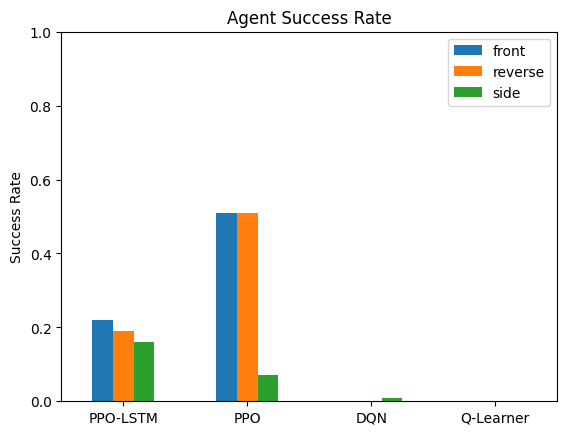

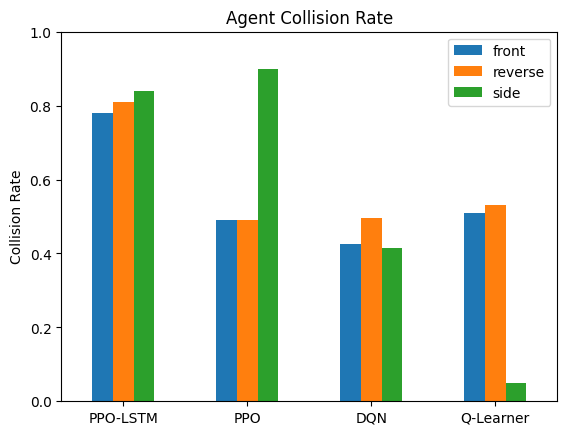

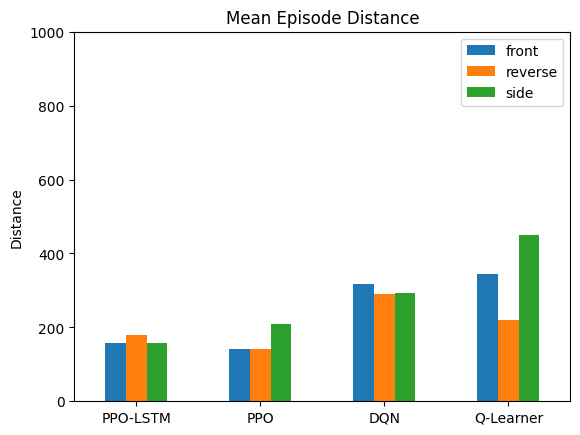

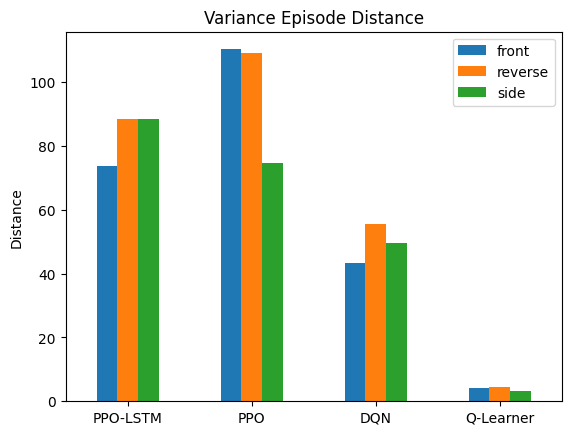

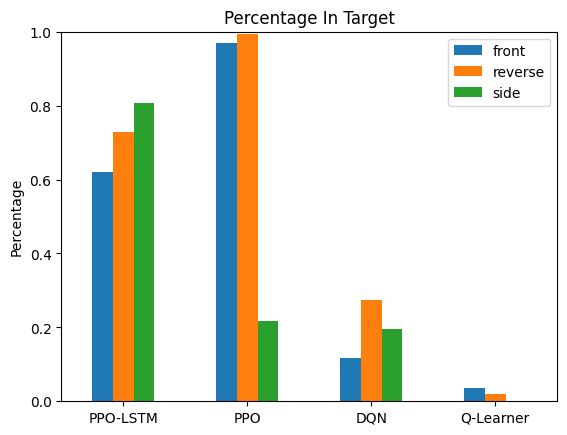

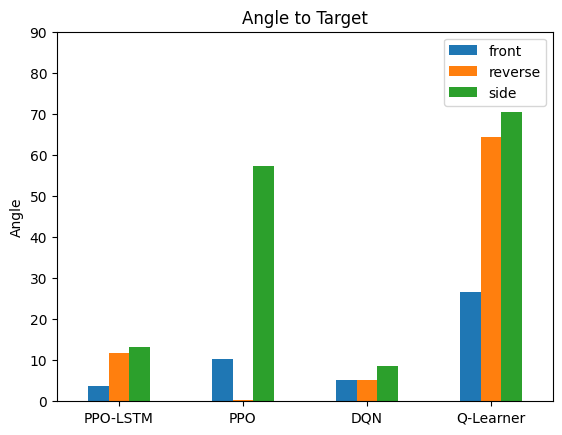

In [47]:
axs = [(plot.__name__, plot()) for plot in PLOTS]
for name, ax in axs:
    ax.figure.savefig(f'{name}.png')

